# Capstone Project - Battle of the Neighborhoods 
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Analysis](#analysis)
* [Results](#results)
* [Conclusion](#conclusion)

## Introduction <a name="intrduction"></a>

#### Business Problem

I will be attempting to leverage data and analysis as well as some business knowledge to assist an entrepreneur in deciding a location for a new business. The chosen business is a **hookah bar** and the chosen city is **Austin, TX** 

I chose a **hookah bar** because it is exotic, multicultural, and in my experience, a good place for the youth in a large city to mingle. I chose **Austin** because it is a growing tech and education hub and would be a great city for a niche business like this to earn profit.

My selection and analysis of data will be aimed at segmenting the city and identifying  a location close to the **downtown/central business district** that is not yet saturated with hookah bars.

## Data <a name="data"></a>

Preliminary trial and error shows me that it will be most efficient to segment the city by zipcodes because the neighborhood set for Austin is so small that any conclusions made using those values will not be of great depth or accuracy. The zipcode set for this city is much larger and will provide a much clearer insight into the characteristics of the sections of the city and their viability for business.

Most of the data will be acquired using the **FoursquareAPI** and the **Google Maps API geocoding**

I found a simple lookup table at the **Opendatasoft** website that has US zipcodes tabulated with their latitude and longitude values. The site contains a convenient feature that lets users download tables for their desired geographical region.

#### Import necessary packages and install relevant modules

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import urllib
import requests
import numpy as np
import json
from pandas.io.json import json_normalize

In [2]:
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


print('Libraries imported.')

Libraries imported.


## Analysis <a name="analysis"></a>

#### Get zipcodes along with corresponding coordinates and clean up data

In [3]:
austin_zipcode_table=pd.read_csv('https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/download/?format=csv&refine.state=TX&timezone=America/Denver', sep=';')
austin_zipcode_table=austin_zipcode_table.drop(['timezone', 'dst', 'geopoint'], axis=1)


#### There are 83 zipcodes in total

In [4]:
austin_data=austin_zipcode_table[austin_zipcode_table['city']=='Austin'].reset_index(drop=True)
austin_data.rename({'zip': 'Zipcode'}, axis=1, inplace=True)
austin_data = austin_data.drop(['city', 'state'], axis=1).reset_index(drop=True)
print(austin_data.shape)


print(austin_data.count())
austin_data.head()

(83, 3)
Zipcode      83
latitude     83
longitude    83
dtype: int64


,Zipcode,latitude,longitude
0,78749,30.216108,-97.858280
1,78785,30.326374,-97.771258
2,78735,30.250761,-97.844690
3,78744,30.188377,-97.740380
4,78783,30.326374,-97.771258


In [5]:
url_borders = 'http://polygons.openstreetmap.fr/get_geojson.py?id=113314&parama=0'
austin_borders  = requests.get(url_borders).json()

address = 'Austin, Texas'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Austin are {}, {}.'.format(latitude, longitude))

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


The geograpical coordinate of Austin are 30.2711286, -97.7436995.


#### Overlay zipcode locations unto map of Austin

In [6]:
map_austin = folium.Map(location=[latitude, longitude], zoom_start=10, tiles = "OpenStreetMap")

# add markers to map
for lat, lng, zipcode in zip(austin_data['latitude'], austin_data['longitude'], austin_data['Zipcode']):
    label = '{},'.format(zipcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_austin)  
    
map_austin.choropleth(geo_data = austin_borders, fill_color=None)

map_austin

In [43]:
CLIENT_ID = 'UISM5KU1JZVMGVGO3MDL1X3XAKO1VMNB4EEQMYVH4CHNMJKT'
CLIENT_SECRET = 'ULT5ZGDXE2YDQIJKO1UT54IWGYGPWLXNBH1I2DL5A1EHYNAN'
VERSION = '20180605' # Foursquare API version

print('Credentials Acquired!')


Credentials Acquired!


#### Locate ideal zipcode as the current most successful zipcode in the hookah business in Austin

In [45]:
query = 'hookah'
radius = 50000
LIMIT = 40
    
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, query, radius, LIMIT)


In [46]:
results = requests.get(url).json()
venues = results['response']['venues']
df = json_normalize(venues)
df.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d119941735', 'name': 'H...",False,4de1d0a0c65b7a3e210cb339,2621 Jones Rd Ste A,US,Austin,United States,NaN,7705,"[2621 Jones Rd Ste A, Austin, TX 78745, United...","[{'label': 'display', 'lat': 30.22476737406097...",30.224767,-97.803196,78745,TX,Off The Hookah Lounge And Smoke Shop,v-1561810516,NaN
1,"[{'id': '4bf58dd8d48988d119941735', 'name': 'H...",False,5515eda7498ed8db3d8eccdd,84 N Interstate 35,US,Austin,United States,NaN,1396,"[84 N Interstate 35, Austin, TX 78701, United ...","[{'label': 'display', 'lat': 30.25970602164228...",30.259706,-97.737685,78701,TX,Rainey Hookah Lounge & Bar,v-1561810516,NaN
2,"[{'id': '4bf58dd8d48988d119941735', 'name': 'H...",False,52e9cbb411d224511aab8d1b,2001 Guadalupe St,US,Austin,United States,West campus,1342,"[2001 Guadalupe St (West campus), Austin, TX 7...","[{'label': 'display', 'lat': 30.28308358432630...",30.283084,-97.741885,78705,TX,Babylon Hookah,v-1561810516,NaN
3,"[{'id': '4d4b7105d754a06374d81259', 'name': 'F...",False,4f321e0f19836c91c7b7abad,104 E 31st St,US,Austin,United States,NaN,2756,"[104 E 31st St, Austin, TX 78705, United States]","[{'label': 'display', 'lat': 30.29515, 'lng': ...",30.295150,-97.736730,78705,TX,Smoke 'N O's Hookah Cafe,v-1561810516,NaN
4,"[{'id': '4bf58dd8d48988d119941735', 'name': 'H...",False,53097b9d11d22bc58e3e8c01,NaN,US,Austin,United States,NaN,3773,"[Austin, TX, United States]","[{'label': 'display', 'lat': 30.23995845483286...",30.239958,-97.728274,NaN,TX,Ontario Hookah Lounge,v-1561810516,NaN


In [47]:
df = df[['name', 'location.postalCode', 'location.city']]
df = df[df['location.city'] == 'Austin']
df.rename({'location.city':'City', 'location.postalCode':'Zipcode'}, axis=1, inplace=True)
df = df.dropna(subset=['Zipcode'], how='any', axis=0).reset_index(drop=True)
print(df.shape)
df

(13, 3)


,name,Zipcode,City
0,Off The Hookah Lounge And Smoke Shop,78745,Austin
1,Rainey Hookah Lounge & Bar,78701,Austin
2,Babylon Hookah,78705,Austin
3,Smoke 'N O's Hookah Cafe,78705,Austin
4,Royal Hookah Bar,78722,Austin
5,Hookah Buzz,78759,Austin
6,Kasbah Moroccan Lounge,78705,Austin
7,Lone Star Hookahs,78705,Austin
8,The Bulgarian's Hookah Lounge,78748,Austin
9,Yahala Hookah Lounge,78752,Austin


In [48]:
df_rankedby_bars = df.groupby('Zipcode').count()
df_rankedby_bars = df_rankedby_bars.drop(['City'], axis=1)
df_rankedby_bars.sort_values(['name'], ascending=False, axis=0, inplace=True)
print(df_rankedby_bars.sum())

indicator_zipcode = df_rankedby_bars['name'].argmax()
print ('\033[7m' + indicator_zipcode)
df_rankedby_bars

name    13
dtype: int64
78705


C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  


,name
Zipcode,
78705,4
78753,2
78759,2
78701,1
78722,1
78745,1
78748,1
78752,1


#### Ideal zipcode to emulate identified as:       78705, having the most hookah bars in the city

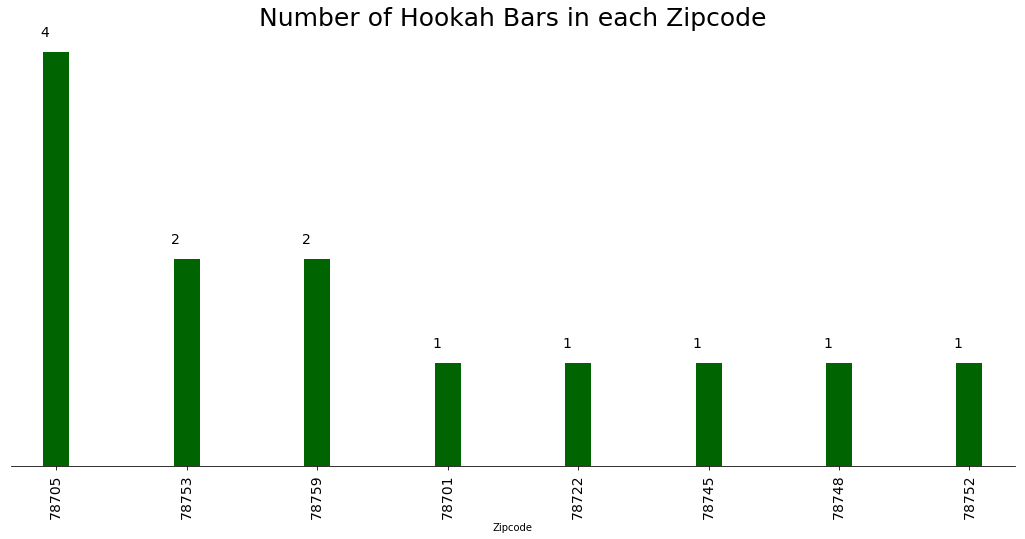

In [35]:
ax=df_rankedby_bars.plot(kind='bar', figsize=(18,8), width=0.2, fontsize=14, color='#006400')

ax.set_title('Number of Hookah Bars in each Zipcode', fontsize=25)
ax.set_yticks([])
ax.legend().remove()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())


# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right;
    ax.text(i.get_x()-.02, i.get_height()+.15, \
            str(round((i.get_height()), 2)), fontsize=14)


#### Get list of businesses in all zipcodes, up to a treshold, for cluster analysis

In [13]:
LIMIT = 100
radius = 500

def getNearbyVenues(names, latitudes, longitudes):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Zipcode', 
                  'Zipcode Latitude', 
                  'Zipcode Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


austin_venues = getNearbyVenues(names=austin_data['Zipcode'],
                                   latitudes=austin_data['latitude'],
                                   longitudes=austin_data['longitude']
                                  )

austin_venues.head()

78749
78785
78735
78744
78783
78750
78788
78710
78751
78752
78754
78712
78723
78733
78708
78705
78701
78716
78721
78787
78768
78728
78737
78732
78729
73301
78748
78734
78725
78772
78739
78763
78715
78762
78727
78773
78789
78709
78714
78722
78771
78781
78780
78717
78703
78731
78759
78745
78774
78761
78972
78730
78779
78746
78758
78724
78764
78741
78767
78766
78719
78711
78726
78760
78782
78718
73344
78753
78738
78720
78704
78702
78742
78786
78769
78747
78756
78736
78765
78713
78757
78778
78755


,Zipcode,Zipcode Latitude,Zipcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,78749,30.216108,-97.858280,Brookdale Beckett Meadows,30.217932,-97.860660,Assisted Living
1,78749,30.216108,-97.858280,BA Rentals,30.218750,-97.861610,Construction & Landscaping
2,78749,30.216108,-97.858280,Pool at Dick Nichols Park,30.213670,-97.862301,Pool
3,78785,30.326374,-97.771258,Ridge Oak Reservoir Park,30.330140,-97.770240,Park
4,78785,30.326374,-97.771258,Oates Oasis,30.322485,-97.773685,Lake


#### Prepare data for K-means clustering based on business characteristics (The aim is to identify which cluster our ideal zipcode from earlier lands in):   78705

In [14]:
austin_venues.groupby('Zipcode').count()

# one hot encoding
austin_onehot = pd.get_dummies(austin_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
austin_onehot['Zipcode'] = austin_venues['Zipcode'] 

# move neighborhood column to the first column
fixed_columns = [austin_onehot.columns[-1]] + list(austin_onehot.columns[:-1])
austin_onehot = austin_onehot[fixed_columns]

austin_onehot.head()

,Zipcode,Accessories Store,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Bed & Breakfast,Beer Garden,Beer Store,Boutique,Breakfast Spot,Burger Joint,Bus Line,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Capitol Building,Casino,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Quad,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Electronics Store,Fabric Shop,Farm,Fast Food Restaurant,Flower Shop,Food,Food & Drink Shop,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gay Bar,General Entertainment,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Lighthouse,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motorcycle Shop,Motorsports Shop,Movie Theater,Music Store,Music Venue,Nature Preserve,New American Restaurant,Nightclub,Optical Shop,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Pool,Pub,Public Art,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Rental Service,Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Shipping Store,Ski Shop,Smoke Shop,Soccer Field,Soup Place,Souvenir Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,Steakhouse,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Trade School,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,78749,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,78749,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,78749,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,78785,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,78785,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [15]:
austin_grouped = austin_onehot.groupby('Zipcode').mean().reset_index()
austin_grouped.head()

,Zipcode,Accessories Store,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Bed & Breakfast,Beer Garden,Beer Store,Boutique,Breakfast Spot,Burger Joint,Bus Line,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Capitol Building,Casino,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Quad,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Electronics Store,Fabric Shop,Farm,Fast Food Restaurant,Flower Shop,Food,Food & Drink Shop,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gay Bar,General Entertainment,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Lighthouse,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motorcycle Shop,Motorsports Shop,Movie Theater,Music Store,Music Venue,Nature Preserve,New American Restaurant,Nightclub,Optical Shop,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Pool,Pub,Public Art,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Rental Service,Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Shipping Store,Ski Shop,Smoke Shop,Soccer Field,Soup Place,Souvenir Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,Steakhouse,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Trade School,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,73301,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.5,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.500000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,73344,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.5,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000

In [16]:
num_top_venues = 5

for hood in austin_grouped['Zipcode']:
    temp = austin_grouped[austin_grouped['Zipcode'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


              venue  freq
0              Park   0.5
1              Lake   0.5
2      Optical Shop   0.0
3  Motorsports Shop   0.0
4     Movie Theater   0.0


              venue  freq
0              Park   0.5
1              Lake   0.5
2      Optical Shop   0.0
3  Motorsports Shop   0.0
4     Movie Theater   0.0


            venue  freq
0           Hotel  0.09
1             Bar  0.06
2  Sandwich Place  0.05
3    Cocktail Bar  0.05
4     Coffee Shop  0.04


                  venue  freq
0           Coffee Shop  0.15
1    Mexican Restaurant  0.12
2  Fast Food Restaurant  0.08
3     Convenience Store  0.08
4          Cocktail Bar  0.08


                 venue  freq
0                 Pool  0.17
1                 Park  0.17
2    Mobile Phone Shop  0.17
3                Trail  0.17
4  Sporting Goods Shop  0.17


                venue  freq
0  Mexican Restaurant  0.08
1         Coffee Shop  0.08
2              Bakery  0.08
3                Park  0.04
4          Soup Place  0.04


          

              venue  freq
0              Park   0.5
1              Lake   0.5
2      Optical Shop   0.0
3  Motorsports Shop   0.0
4     Movie Theater   0.0


               venue  freq
0     Discount Store   0.4
1        Video Store   0.2
2       Liquor Store   0.2
3                Bar   0.2
4  Accessories Store   0.0


                venue  freq
0         Gas Station  0.33
1   Convenience Store  0.33
2  Chinese Restaurant  0.33
3   Accessories Store  0.00
4        Optical Shop  0.00


              venue  freq
0              Park   0.5
1              Lake   0.5
2      Optical Shop   0.0
3  Motorsports Shop   0.0
4     Movie Theater   0.0


                venue  freq
0                 Bar  0.18
1         Coffee Shop  0.12
2  Mexican Restaurant  0.12
3      Cosmetics Shop  0.06
4          Taco Place  0.06


               venue  freq
0     Scenic Lookout   0.5
1       Home Service   0.5
2  Accessories Store   0.0
3    Motorcycle Shop   0.0
4   Motorsports Shop   0.0


              ve

In [17]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Zipcode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
zipcodes_venues_sorted = pd.DataFrame(columns=columns)
zipcodes_venues_sorted['Zipcode'] = austin_grouped['Zipcode']

for ind in np.arange(austin_grouped.shape[0]):
    zipcodes_venues_sorted.iloc[ind, 1:] = return_most_common_venues(austin_grouped.iloc[ind, :], num_top_venues)

zipcodes_venues_sorted.head()

,Zipcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,73301,Lake,Park,Yoga Studio,Electronics Store,Food Truck,Food & Drink Shop,Food,Flower Shop,Fast Food Restaurant,Farm,Fabric Shop,Dry Cleaner,Fountain,Donut Shop,Dog Run
1,73344,Lake,Park,Yoga Studio,Electronics Store,Food Truck,Food & Drink Shop,Food,Flower Shop,Fast Food Restaurant,Farm,Fabric Shop,Dry Cleaner,Fountain,Donut Shop,Dog Run
2,78701,Hotel,Bar,Cocktail Bar,Sandwich Place,Music Venue,Movie Theater,Coffee Shop,Steakhouse,Italian Restaurant,Capitol Building,Burger Joint,Comedy Club,Lounge,Mexican Restaurant,Breakfast Spot
3,78702,Coffee Shop,Mexican Restaurant,Convenience Store,Fast Food Restaurant,Pub,Cocktail Bar,Bank,Gift Shop,Butcher,Sandwich Place,Breakfast Spot,Bar,Taco Place,Food Truck,Italian Restaurant
4,78703,Pool,Trail,Park,Mobile Phone Shop,Sporting Goods Shop,Art Gallery,Health Food Store,Donut Shop,Flower Shop,Historic Site,Fast Food Restaurant,Farm,Fabric Shop,Electronics Store,Dry Cleaner


#### All zipcodes have been appended with their 15 most popular business venues as their identifying characteristic

#### K-means clustering can now be used to segment them

In [18]:
# set number of clusters
kclusters = 8

austin_grouped_clustering = austin_grouped.drop('Zipcode', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(austin_grouped_clustering)

zipcodes_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

austin_merged = austin_data

# merge austin_grouped with austin_data to add latitude/longitude for each neighborhood
austin_merged = austin_merged.join(zipcodes_venues_sorted.set_index('Zipcode'), on='Zipcode')

austin_merged=austin_merged.fillna(0)

austin_merged




,Zipcode,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,78749,30.216108,-97.858280,4.0,Pool,Construction & Landscaping,Assisted Living,Electronics Store,Football Stadium,Food Truck,Food & Drink Shop,Food,Flower Shop,Fast Food Restaurant,Farm,Fabric Shop,Yoga Studio,Dry Cleaner,Fountain
1,78785,30.326374,-97.771258,1.0,Lake,Park,Yoga Studio,Electronics Store,Food Truck,Food & Drink Shop,Food,Flower Shop,Fast Food Restaurant,Farm,Fabric Shop,Dry Cleaner,Fountain,Donut Shop,Dog Run
2,78735,30.250761,-97.844690,4.0,Hotel,Gym,Playground,Dog Run,Electronics Store,Farm,Golf Driving Range,Pool,Gym / Fitness Center,Doctor's Office,Health Food Store,Fabric Shop,Historic Site,Dry Cleaner,Donut Shop
3,78744,30.188377,-97.740380,4.0,Recording Studio,Recreation Center,Fried Chicken Joint,Intersection,Park,Food Truck,Yoga Studio,Dry Cleaner,Food,Flower Shop,Fast Food Restaurant,Farm,Fabric Shop,Electronics Store,Doctor's Office
4,78783,30.326374,-97.771258,1.0,Lake,Park,Yoga Studio,Electronics Store,Food Truck,Food & Drink Shop,Food,Flower Shop,Fast Food Restaurant,Farm,Fabric Shop,Dry Cleaner,Fountain,Donut Shop,Dog Run
5,78750,30.438933,-97.803830,3.0,Tennis Court,Yoga Studio,French Restaurant,Football Stadium,Food Truck,Food & Drink Shop,Food,Flower Shop,Fast Food Restaurant,Farm,Fabric Shop,Electronics Store,Dry Cleaner,Donut Shop,Dog Run
6,78788,30.326374,-97.771258,1.0,Lake,Park,Yoga Studio,Electronics Store,Food Truck,Food & Drink Shop,Food,Flower Shop,Fast Food Restaurant,Farm,Fabric Shop,Dry Cleaner,Fountain,Donut Shop,Dog Run
7,78710,30.351953,-97.715123,4.0,Mexican Restaurant,Korean Restaurant,Hobby Shop,Gym / Fitness Center,Comedy Club,Shipping Store,Music Store,Fabric Shop,General Entertainment,Electronics Store,Karaoke Bar,Tailor Shop,Food,Flower Shop,Fast Food Restaurant
8,78751,30.310707,-97.723000,4.0,Bus Stop,Pool,Coffee Shop,Mexican Restaurant,Breakfast Spot,Beer Store,Bed & Breakfast,Tennis Court,Juice Bar,Food Truck,Convenience Store,Record Shop,Flower Shop,Diner,Food & Drink Shop
9,78752,30.332506,-97.705710,4.0,Hotel,Indian Restaurant,Movie Theater,Sushi Restaurant,Korean Restaurant,Chinese Restaurant,Mexican Restaurant,Diner,Doctor's Office,Fast Food Restaurant,Food Truck,Food & Drink Shop,Food,Flower Shop,Dessert Shop


#### The random distribution of the similarly-colored dots shows that the clusters were actually chosen by shared characteristics, rather than location

In [19]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]



# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(austin_merged['latitude'], austin_merged['longitude'], austin_merged['Zipcode'], austin_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters.choropleth(geo_data = austin_borders, fill_color='transparent')

map_clusters

#### Clusters are tabulated below and we will extract the cluster that contains our ideal zipcode

In [20]:
austin_merged.loc[austin_merged['Cluster Labels'] == 1, austin_merged.columns[[0] + list(range(5, austin_merged.shape[1]))]]

,Zipcode,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
1,78785,Park,Yoga Studio,Electronics Store,Food Truck,Food & Drink Shop,Food,Flower Shop,Fast Food Restaurant,Farm,Fabric Shop,Dry Cleaner,Fountain,Donut Shop,Dog Run
4,78783,Park,Yoga Studio,Electronics Store,Food Truck,Food & Drink Shop,Food,Flower Shop,Fast Food Restaurant,Farm,Fabric Shop,Dry Cleaner,Fountain,Donut Shop,Dog Run
6,78788,Park,Yoga Studio,Electronics Store,Food Truck,Food & Drink Shop,Food,Flower Shop,Fast Food Restaurant,Farm,Fabric Shop,Dry Cleaner,Fountain,Donut Shop,Dog Run
14,78708,Park,Yoga Studio,Electronics Store,Food Truck,Food & Drink Shop,Food,Flower Shop,Fast Food Restaurant,Farm,Fabric Shop,Dry Cleaner,Fountain,Donut Shop,Dog Run
19,78787,Park,Yoga Studio,Electronics Store,Food Truck,Food & Drink Shop,Food,Flower Shop,Fast Food Restaurant,Farm,Fabric Shop,Dry Cleaner,Fountain,Donut Shop,Dog Run
20,78768,Park,Yoga Studio,Electronics Store,Food Truck,Food & Drink Shop,Food,Flower Shop,Fast Food Restaurant,Farm,Fabric Shop,Dry Cleaner,Fountain,Donut Shop,Dog Run
25,73301,Park,Yoga Studio,Electronics Store,Food Truck,Food & Drink Shop,Food,Flower Shop,Fast Food Restaurant,Farm,Fabric Shop,Dry Cleaner,Fountain,Donut Shop,Dog Run
29,78772,Park,Yoga Studio,Electronics Store,Food Truck,Food & Drink Shop,Food,Flower Shop,Fast Food Restaurant,Farm,Fabric Shop,Dry Cleaner,Fountain,Donut Shop,Dog Run
33,78762,Park,Yoga Studio,Electronics Store,Food Truck,Food & Drink Shop,Food,Flower Shop,Fast Food Restaurant,Farm,Fabric Shop,Dry Cleaner,Fountain,Donut Shop,Dog Run
35,78773,Park,Yoga Studio,Electronics Store,Food Truck,Food & Drink Shop,Food,Flower Shop,Fast Food Restaurant,Farm,Fabric Shop,Dry Cleaner,Fountain,Donut Shop,Dog Run


In [21]:
austin_merged.loc[austin_merged['Cluster Labels'] == 2, austin_merged.columns[[0] + list(range(5, austin_merged.shape[1]))]]

,Zipcode,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
13,78733,Yoga Studio,Dry Cleaner,Food Truck,Food & Drink Shop,Food,Flower Shop,Fast Food Restaurant,Farm,Fabric Shop,Electronics Store,Donut Shop,Fountain,Dog Run,Doctor's Office
79,78713,Football Stadium,Dry Cleaner,Food Truck,Food & Drink Shop,Food,Flower Shop,Fast Food Restaurant,Farm,Fabric Shop,Electronics Store,Yoga Studio,Fountain,Dog Run,Doctor's Office


In [22]:
austin_merged.loc[austin_merged['Cluster Labels'] == 3, austin_merged.columns[[0] + list(range(5, austin_merged.shape[1]))]]

,Zipcode,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
5,78750,Yoga Studio,French Restaurant,Football Stadium,Food Truck,Food & Drink Shop,Food,Flower Shop,Fast Food Restaurant,Farm,Fabric Shop,Electronics Store,Dry Cleaner,Donut Shop,Dog Run


In [23]:
ideal_cluster=austin_merged.loc[austin_merged['Cluster Labels'] == 4, austin_merged.columns[[0] + list(range(5, austin_merged.shape[1]))]]
ideal_cluster

,Zipcode,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,78749,Construction & Landscaping,Assisted Living,Electronics Store,Football Stadium,Food Truck,Food & Drink Shop,Food,Flower Shop,Fast Food Restaurant,Farm,Fabric Shop,Yoga Studio,Dry Cleaner,Fountain
2,78735,Gym,Playground,Dog Run,Electronics Store,Farm,Golf Driving Range,Pool,Gym / Fitness Center,Doctor's Office,Health Food Store,Fabric Shop,Historic Site,Dry Cleaner,Donut Shop
3,78744,Recreation Center,Fried Chicken Joint,Intersection,Park,Food Truck,Yoga Studio,Dry Cleaner,Food,Flower Shop,Fast Food Restaurant,Farm,Fabric Shop,Electronics Store,Doctor's Office
7,78710,Korean Restaurant,Hobby Shop,Gym / Fitness Center,Comedy Club,Shipping Store,Music Store,Fabric Shop,General Entertainment,Electronics Store,Karaoke Bar,Tailor Shop,Food,Flower Shop,Fast Food Restaurant
8,78751,Pool,Coffee Shop,Mexican Restaurant,Breakfast Spot,Beer Store,Bed & Breakfast,Tennis Court,Juice Bar,Food Truck,Convenience Store,Record Shop,Flower Shop,Diner,Food & Drink Shop
9,78752,Indian Restaurant,Movie Theater,Sushi Restaurant,Korean Restaurant,Chinese Restaurant,Mexican Restaurant,Diner,Doctor's Office,Fast Food Restaurant,Food Truck,Food & Drink Shop,Food,Flower Shop,Dessert Shop
11,78712,Pool,Fast Food Restaurant,Performing Arts Venue,Football Stadium,College Quad,Art Museum,Fountain,Sandwich Place,History Museum,College Arts Building,College Gym,Taco Place,Public Art,Asian Restaurant
15,78705,Food Truck,Convenience Store,Music Venue,Taco Place,Sandwich Place,Shipping Store,Pub,Coffee Shop,Bar,Mexican Restaurant,Chinese Restaurant,Boutique,Beer Garden,Sports Bar
16,78701,Bar,Cocktail Bar,Sandwich Place,Music Venue,Movie Theater,Coffee Shop,Steakhouse,Italian Restaurant,Capitol Building,Burger Joint,Comedy Club,Lounge,Mexican Restaurant,Breakfast Spot
17,78716,Pizza Place,Pet Store,Dry Cleaner,Food Truck,Food & Drink Shop,Food,Flower Shop,Fast Food Restaurant,Farm,Fabric Shop,Electronics Store,Yoga Studio,Fountain,Donut Shop


In [24]:
austin_merged.loc[austin_merged['Cluster Labels'] == 5, austin_merged.columns[[0] + list(range(5, austin_merged.shape[1]))]]

,Zipcode,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
23,78732,Yoga Studio,Dry Cleaner,Food Truck,Food & Drink Shop,Food,Flower Shop,Fast Food Restaurant,Farm,Fabric Shop,Electronics Store,Donut Shop,Fountain,Dog Run,Doctor's Office
46,78759,Yoga Studio,Dry Cleaner,Food Truck,Food & Drink Shop,Food,Flower Shop,Fast Food Restaurant,Farm,Fabric Shop,Electronics Store,Donut Shop,Fountain,Dog Run,Doctor's Office


In [25]:
austin_merged.loc[austin_merged['Cluster Labels'] == 6, austin_merged.columns[[0] + list(range(5, austin_merged.shape[1]))]]

,Zipcode,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
68,78738,Yoga Studio,Electronics Store,Food Truck,Food & Drink Shop,Food,Flower Shop,Fast Food Restaurant,Farm,Fabric Shop,Dry Cleaner,Fountain,Donut Shop,Dog Run,Doctor's Office


In [26]:
austin_merged.loc[austin_merged['Cluster Labels'] == 7, austin_merged.columns[[0] + list(range(5, austin_merged.shape[1]))]]

,Zipcode,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
72,78742,Yoga Studio,Dry Cleaner,Food Truck,Food & Drink Shop,Food,Flower Shop,Fast Food Restaurant,Farm,Fabric Shop,Electronics Store,Donut Shop,Fountain,Dog Run,Doctor's Office


In [27]:
austin_merged.loc[austin_merged['Cluster Labels'] == 8, austin_merged.columns[[0] + list(range(5, austin_merged.shape[1]))]]

,Zipcode,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue


#### Rapid parsing shows that the ideal zipcode (78705) lands in Cluster4, making it the ideal cluster

In [37]:
ideal_cluster_zipcodes=ideal_cluster['Zipcode'].reset_index()
ideal_cluster_data = pd.merge(ideal_cluster_zipcodes, austin_data, on='Zipcode').drop('index', axis=1).reset_index()
print(ideal_cluster_data.shape)
ideal_cluster_data

(34, 4)


,index,Zipcode,latitude,longitude
0,0,78749,30.216108,-97.858280
1,1,78735,30.250761,-97.844690
2,2,78744,30.188377,-97.740380
3,3,78710,30.351953,-97.715123
4,4,78751,30.310707,-97.723000
5,5,78752,30.332506,-97.705710
6,6,78712,30.285207,-97.735394
7,7,78705,30.292424,-97.738560
8,8,78701,30.271270,-97.741030
9,9,78716,30.316223,-97.858770


#### Overlay of the locations with ideal zipcode in red to show randon distribution once more

In [29]:
map_austin_target = folium.Map(location=[latitude, longitude], zoom_start=10, tiles = "OpenStreetMap")

# add markers to map
for lat, lng, zipcode in zip(ideal_cluster_data['latitude'], ideal_cluster_data['longitude'], ideal_cluster_data['Zipcode']):
    label = '{},'.format(zipcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_austin_target)
    folium.CircleMarker(location=[30.292424,-97.738560], radis=8, color='cyan', popup='label', fill=True,
        fill_color='#ff4500', fill_opacity=1.0, parse_html=False).add_to(map_austin_target)
    
map_austin_target.choropleth(geo_data = austin_borders, fill_color=None)

map_austin_target

#### We will have to calculate the distances to find a balance between proximity to city center, and separation from ideal zipcode so as to avoid competing in the saturated area

In [38]:
address = 'Downtown, Austin, Texas'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_d = location.latitude
longitude_d = location.longitude
print('The geograpical coordinate of Downtown Austin are {}, {}.'.format(latitude_d, longitude_d))


from geopy import distance

from_location_1=(latitude_d,longitude_d)
from_location_2=ideal_cluster_data['latitude'].loc[7],ideal_cluster_data['longitude'].iloc[7]
to_locations=ideal_cluster_data['latitude'],ideal_cluster_data['longitude']


def calc_distance(from_loc, to_lat, to_long):
    return distance.distance(from_loc, (to_lat, to_long)).miles

ideal_cluster_data['dist_from_DT'] = ideal_cluster_data.apply(lambda row: calc_distance(from_location_1, row.latitude, row.longitude), axis=1)
ideal_cluster_data['dist_from_TZ'] = ideal_cluster_data.apply(lambda row: calc_distance(from_location_2, row.latitude, row.longitude), axis=1)
ideal_cluster_data.head()

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Downtown Austin are 30.2680536, -97.7447642.


,index,Zipcode,latitude,longitude,dist_from_DT,dist_from_TZ
0,0,78749,30.216108,-97.858280,7.674341,8.882029
1,1,78735,30.250761,-97.844690,6.092861,6.964309
2,2,78744,30.188377,-97.740380,5.494618,7.167900
3,3,78710,30.351953,-97.715123,6.044732,4.333180
4,4,78751,30.310707,-97.723000,3.213293,1.565592


In [39]:
plot_data=ideal_cluster_data.drop(['index','latitude','longitude'],axis=1)
plot_data=plot_data.sort_values(['dist_from_DT', 'dist_from_TZ'], axis=0)
plot_data=plot_data.set_index(['Zipcode'], drop=True)
plot_data.head()

,dist_from_DT,dist_from_TZ
Zipcode,,
78701,0.314543,1.464624
78712,1.307663,0.531941
78702,1.565828,2.219138
78705,1.719206,0.000000
78704,1.780755,3.445273


C:\Users\owner\Anaconda3\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


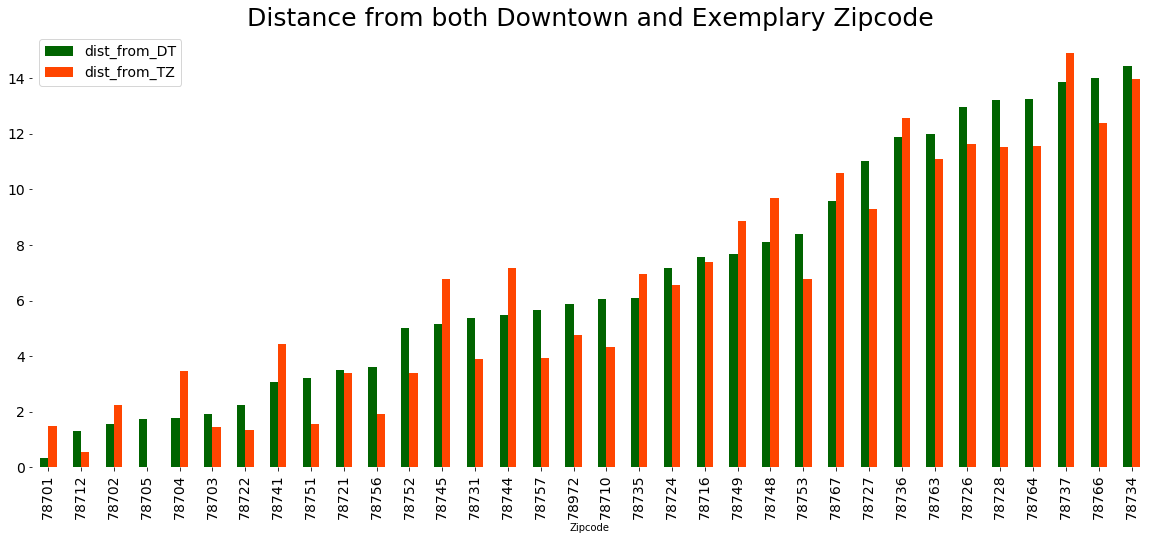

In [40]:
ax=plot_data.plot(kind='bar', figsize=(20,8), fontsize=14, colors=['#006400', '#ff4500'])


ax.set_title('Distance from both Downtown and Exemplary Zipcode', fontsize=25)
ax.legend(fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


#### The ideal zipcode is less than 2 miles from the city center, but we will cast a slightly wider net and select locations that are within 3 miles of the city center

In [33]:
ideal_cluster_data=ideal_cluster_data[ideal_cluster_data['dist_from_DT'] < 3].reset_index(drop=True)
ideal_cluster_data

,index,Zipcode,latitude,longitude,dist_from_DT,dist_from_TZ
0,6,78712,30.285207,-97.735394,1.307663,3.034480
1,7,78705,30.292424,-97.738560,1.719206,3.381513
2,8,78701,30.271270,-97.741030,0.314543,3.253357
3,17,78722,30.289307,-97.716590,2.231716,2.115919
4,18,78703,30.290907,-97.762770,1.907086,4.716274
5,29,78704,30.246309,-97.760870,1.780755,4.801948
6,30,78702,30.265158,-97.718790,1.565828,1.994801


#### Eliminate areas that are too close to the ideal zipcode and be left with our chosen candidate areas

In [34]:
candidate_areas=ideal_cluster_data[ideal_cluster_data['dist_from_TZ'] > 1.5].reset_index(drop=True)
candidate_areas

,index,Zipcode,latitude,longitude,dist_from_DT,dist_from_TZ
0,6,78712,30.285207,-97.735394,1.307663,3.034480
1,7,78705,30.292424,-97.738560,1.719206,3.381513
2,8,78701,30.271270,-97.741030,0.314543,3.253357
3,17,78722,30.289307,-97.716590,2.231716,2.115919
4,18,78703,30.290907,-97.762770,1.907086,4.716274
5,29,78704,30.246309,-97.760870,1.780755,4.801948
6,30,78702,30.265158,-97.718790,1.565828,1.994801


## Results <a name="results"></a>

The analysis of Austin Texas segmented by zipcodes showed that the city is as of now under-served, with only **13** hookah bars in a city that large with a young population and an economy which is set to keep growing as the city expands its tech and other sectors.

After segmenting the city by zipcodes, the analysis here looked into which part of the city had been previously successful in the hookah business. This was done by using a **FourSquare API** query to get a listing of all hookah bars in the city. The resulting data was then tabulated and sorted & grouped by zipcode to find that in a city with **83** zipcodes and only **13** hookah bars, **4** of them were located in one particular zipcode (**78705**). This area is clearly ideal for that business, but is to be considered saturated. The savvy thing to do is therefore to extract the features of this area and see what other zones in the city are similar to it.

Another **FourSquare API** query was used to get a list of businesses in the zipcodes of the city and sort them by most popular for their region. A **k-means clustering** analysis was then performed to divide the regions into **8** clusters based on their **15** most popular venue categories. The cluster with the ideal characteristics was the one that contained our ideal zipcode and it was chosen for further analysis.

Many of the other zones in this cluster are too far from the city center to be considered safe for a new niche investment. We used the **geopy** distance module to append their distances from the city center onto the dataframe. We also obtained and appended their distance from the saturated/ideal region. Both of these values were used to find a balance between areas close to the city center, yet far away from competion.

The resulting two regions are zipcodes: **78702** and **78704**


## Conclusion <a name='conclusion'></a>

The aim of this project is to use available data and insights to help an entrepreneur select a region of Austin, Texas to establish a new hookah bar. We used sourced data from various sources and used several Python modules along with machine learning to extract hidden insights from the data.

The 2 candidate areas extracted from the data are the best places to explore locations for a new hookah bar. They are close to the center of the city central/business district. They are outside the single region which has a saturated amount of hookah bars, but are very similar to it in terms of what businesses tend to thrive in them. As such they are a mix of great opportunity and reduced competition. I have a high level of confidence that an entrepreneur who established a new venue in one these areas and followed other best practices of business would be very successful.